# The Sparks Foundation
# GRIP JANUARY 2022
# Data Science and Business Analytics Intern

# TASK 6:
**Prediction Using Decision Tree Algorithm**

Author: ROHIT BHATIA


# **Libraries**

In [1]:
#importing required libraries
import sklearn.datasets as dataset
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from six import StringIO
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn import metrics

# **Data**

In [2]:
#reading data 
irisData = dataset.load_iris()

#converting data into a dataframe
irisDataFrame = pd.DataFrame(irisData.data, columns = irisData.feature_names)
print(irisDataFrame.head(10))

#converting categories to integer numbers
# 0 represents setosa
# 1 represents versicolor
# 2 represents virginica
print()
category = irisData.target
print(category)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

# **Summary of Dataset- IRIS**

In [3]:
#summary of Iris dataset
irisDataFrame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
irisDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# **Choosing data for training and testing**

In [5]:
#extracting data for training and testing 
x_train, x_test, y_train, y_test = train_test_split(irisDataFrame, category, random_state = 1)
print(x_test)
print(y_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
14                 5.8               4.0                1.2               0.2
98                 5.1               2.5                3.0               1.1
75                 6.6               3.0                4.4               1.4
16                 5.4               3.9                1.3               0.4
131                7.9               3.8                6.4               2.0
56                 6.3               3.3                4.7               1.6
141                6.9               3.1                5.1               2.3
44                 5.1               3.8                1.9               0.4
29                 4.7               3.2                1.6               0.2
120                6.9               3.2                5.7               2.3
94                 5.6               2.7                4.2               1.3
5                  5.4               3.9                1.7     

# **Decision Tree algorithm**

In [6]:
#creating Decision Tree Algorithm for prediction
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
print("Decision Tree Classifier is created successfully")

Decision Tree Classifier is created successfully


# **Decision tree visualization**

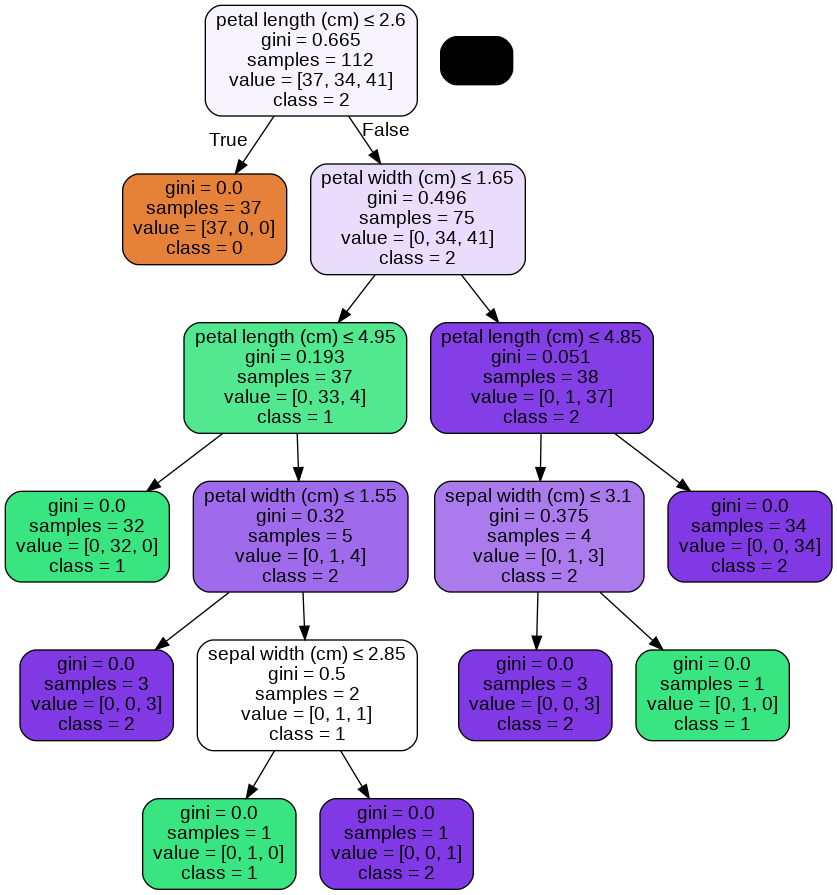

In [7]:
#Visualizing the Decision tree
dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = irisData.feature_names, class_names = ['0','1','2'])
graph =  graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# **Finding the accuracy of the classifier**

In [8]:
#classifying the new/unknown data using Decision tree classifier
cl1 = classifier.predict([[1.1,0.3,2.1,6.9]])
print("Type of Species--->" ,cl1)

cl1 = classifier.predict([[1.1,3.3,6.1,6.9]])
print("Type of Species--->" ,cl1)

Type of Species---> [0]
Type of Species---> [2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [9]:
#testing the accuracy of classifier using test data
classify = classifier.predict(x_test)
print(classify)

#Calculating accuracy
acc = metrics.accuracy_score(y_test, classify)
print("Accuracy of the classifier is (in percentage): ", acc*100)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
Accuracy of the classifier is (in percentage):  97.36842105263158


**The accuracy of the decision tree algorithm when used on the given iris dataset is around 97%.**